In [14]:
import numpy as np
from doodler import *
import matplotlib.pyplot as plt
from network import *
from dense import Dense
from activation import Activation
from loss import *
from activation_functions import *
from keras.datasets import mnist
from keras.utils import np_utils


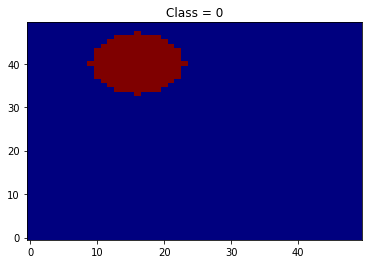

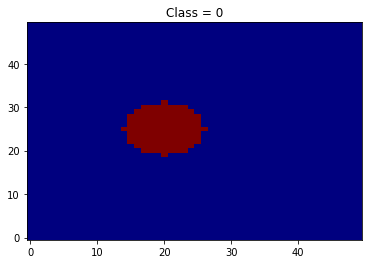

In [15]:
#doodler = Doodler()
im = gen_standard_cases(count=2, types=['ball', 'frame'])

In [16]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils

from dense import Dense
from activation_functions import Tanh, Sigmoid, Softmax
from loss import mse, dmse
from network import train, predict


def preprocess_data(x, y, limit):
    # reshape and normalize input data
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype("float32") / 255
    # encode output which is a number in range [0,9] into a vector of size 10
    # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    y = np_utils.to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[:limit], y[:limit]


# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 1000)
x_test, y_test = preprocess_data(x_test, y_test, 20)

# neural network
network = [
    Dense(28 * 28, 40, regularization='l2', reg_lambda=0.1),
    Sigmoid(),
    Dense(40, 10, regularization='l2', reg_lambda=0.1),
    Softmax()
]

# train
train(network, mse, dmse, x_train, y_train, epochs=100, lr=0.1)

# test
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    print('pred:', np.argmax(output), '\ttrue:', np.argmax(y))


# calculate the accuracy
accuracy = 0
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    accuracy += np.argmax(output) == np.argmax(y)
accuracy /= len(x_test)
print('accuracy:', accuracy)

TypeError: __init__() got an unexpected keyword argument 'regularization'